<img src="heart_pic.jpg"/>

# Predicting heart disease using machine learning

This notebook attempts to build a machine learning model that predicts whether or not someone has heart disease given a set of data features and Python-based machine-learning/data-science libraries.

Process Outline:
1. Problem definition
2. Data
3. Evaluation Metric Creation
4. Features
5. Modelling
6. Optimization/Modelling Adjustments
7. Conclusion

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease effectively?

This is a direct look at one of the more controversial insurance company analyses, the mortality risk calculation. This factor is determined by summing up various potential diseases. One of which, is the heart disease factor. Given medical information about a patient determining this risk factor will be calculated and its predictive accuracy will be measured on a real data sample.



## 2. Data

The original data came from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a free open source version availible on Kaggle. 
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> The primary objective is to reach 90% accuracy for prediciting heart-disease in patients during this initial proof of concept stage.

<img src="90_.png" height = 300px width = 300px />

## 4. Features

I am not a medical expert in any regard and so it was important to go through what the features actually meant to check and see if the algorithms were producing sensical results.

**Create Data Dictionary**

14 Features:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the Tools

Tools that will be used include; Pandas, Matplotlib, and NumPy for data analysis and manipulation

In [4]:
# Importation of Tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [7]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (EDA)

Ensure understanding of subject matter related to data to prevent falling into traps of over-fitting nonesensical relationships and other modelling anomolies

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
# How many of each class there are for the target feature
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

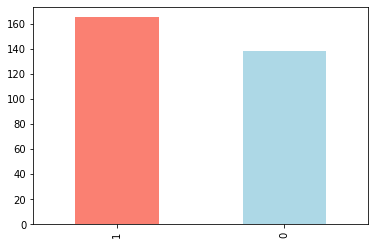

In [14]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# There happens to not be any missing data in this set
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [19]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [21]:
# Notice women have higher relative chance of heart disease (looking only at 1 feature)

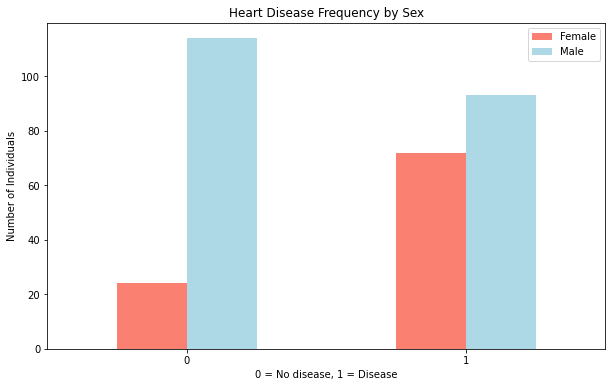

In [37]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency by Sex");
plt.xlabel("0 = No disease, 1 = Disease");
plt.ylabel("Number of Individuals");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age cs. Max Heart Rate for Heart Disease

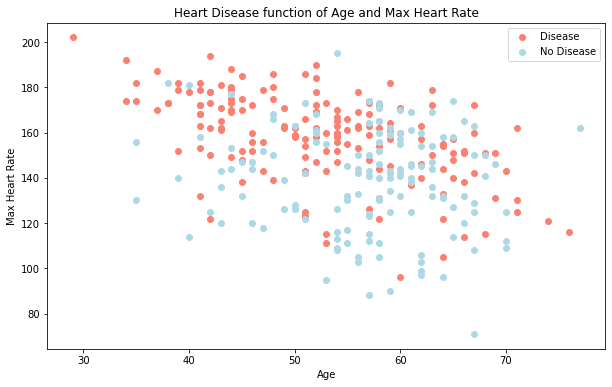

In [33]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue")

# Add some helpful info
plt.title("Heart Disease function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["Disease", "No Disease"]);

In [30]:
# Note that it is quite difficult to differentiate between them, this is where machine learning can give more nuanced patterns

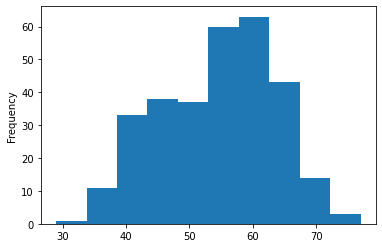

In [35]:
# Check the distribution of the age column using histogram
df.age.plot.hist();

### Heart Disease Frequency and Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [36]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [38]:
# Note: Non-heart related type 2 chest pain has highest rate of heart disease. 
# If in doubt ask experts on their thoughts. Ensure no biases in dataset.

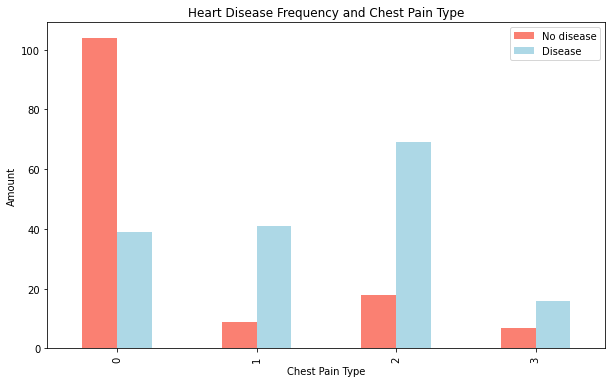

In [39]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency and Chest Pain Type");
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");
plt.legend(["No disease", "Disease"]);

In [40]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


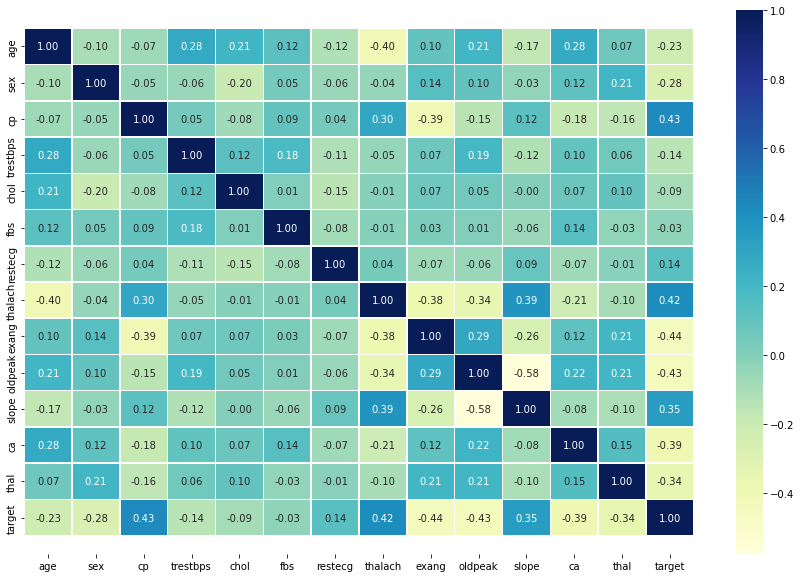

In [43]:
# Let's make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.5, top -0.5);

## 5. Modelling

In [44]:
# Split data into X and y
X = df.drop("target",  axis=1)
y = df.target

In [45]:
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [54]:
# Split data into train and test sets
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
X_train.shape

(242, 13)

Data is ready. Model can be trained on training data sets. 

It will then be evaluated on the test sets. 

The 3 different machine learning models that will be tested are:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [56]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and scores a set of machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models, { "__model_name__" : __model_function__(), ... }
    
    Variables:
        X_train : Training data set (features only)
        X_test : Testing data set (features only)
        
        y_train : Labels associated with training data set
        y_test : Labels associated with testing data set
        
    """
    
    np.random.seed(0)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [57]:
model_scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores

C:\Users\rajak\Documents\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

### Model Comparison

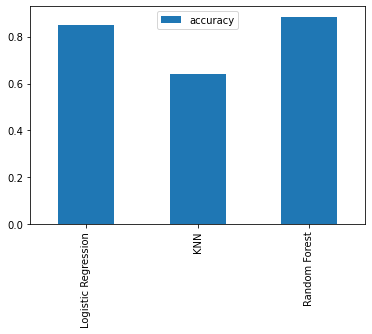

In [59]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

> Now that we are aware of the baseline accuracies of our models we need to test error bounds of these models and produce some types of analysis of what's going on here

**General Machine Learning metrics:**
    
   1. Hyper-Parameter Tuning
   2. Feature Importance
    
    
**Classification Specific metrics:**
    
   3. Confusion Matrix
   4. Cross-validation
   5. Classification Report
       * Precision
       * Recall
       * F1 Score
       * Support
       * Accuracy
       * Macro avg
       * Weighted avg
   6. ROC curve
   7. AUC curve 

### Hyperparameter Tuning

**KNN Model Tuning**

In [64]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,101)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit algorithm
    knn.fit(X_train, y_train)
    
    # Update the training/test scores list
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [65]:
train_scores

[1.0,
 0.7975206611570248,
 0.78099173553719,
 0.7603305785123967,
 0.78099173553719,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.6900826446280992,
 0.71900826446281,
 0.6859504132231405,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818,
 0.6983471074380165,
 0.6859504132231405,
 0.7024793388429752,
 0.7024793388429752,
 0.7024793388429752,
 0.6859504132231405,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6942148760330579,
 0.6942148760330579,
 0.6859504132231405,
 0.6818181818181818,
 0.6776859504132231,
 0.6570247933884298,
 0.6900826446280992,
 0.6735537190082644,
 0.7024793388429752,
 0.6776859504132231,
 0.6942148760330579,
 0.6818181818181818,
 0.6942148760330579,
 0.6983471074380165,
 0.7231404958677686,
 0.6900826446280992,
 0.6776859504132231,
 0.6735537190082644,
 0.67355371900826

In [66]:
test_scores;

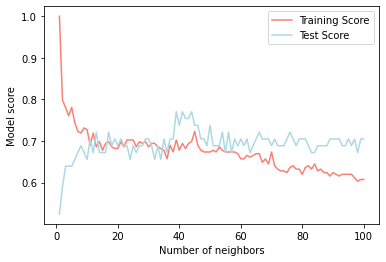

In [69]:
plt.plot(neighbors, train_scores, label="Train score", color="salmon")
plt.plot(neighbors, test_scores, label="Test score", color="lightblue")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend(["Training Score", "Test Score"])

In [71]:
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Maximum KNN score on the test data: 77.05%


Notice that knn score is still significantly below both the random forest classifier and logistic regression even with hyperparameter tuning

**Tuning using RandomizedSearchCV**

In [99]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-10,10), 
                "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = { "n_estimators" : np.arange(10, 1000, 10),
            "max_depth" : [None, 3, 5, 10],
            "min_samples_split" : np.arange(1,20,1)}

In [100]:
# Note: knn model is not to be looked at any further and Randomized Search CV can tune all remaining models at once 

In [101]:
# Tune LogisticRegression
np.random.seed(0)

# Setup random juperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-0...
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [102]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.5998587196060574}

In [103]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now we've tuned LogisticRegression(). Time to do Random Forest.

In [104]:
# Setup random seed
np.random.seed(0)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [105]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 240, 'min_samples_split': 9, 'max_depth': 10}

In [106]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8524590163934426

Ways to tune parameters:
1. by hand
2. RandomizedSearchCV
3. Grid SearchCV

**Tuning with GridSearchCV**

In [87]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-10,10), 
                "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,cv=5,verbose=True)

# Fit grid huperparameter search model
gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [88]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [89]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8524590163934426

In [90]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

## Evaluating our classifiers

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
* Cross-validation when possible

In [107]:
# Make predicitions with tuned model
y_preds = gs_log_reg.predict(X_test)

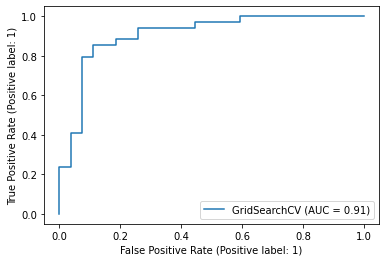

In [108]:
# Plot ROC curve and calculate AUC score
plot_roc_curve(gs_log_reg, X_test, y_test)

In [109]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[22  5]
 [ 4 30]]


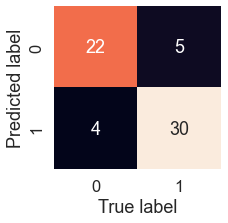

In [113]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax, sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

**Classification Report**

In [115]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [116]:
# Precision is related to low rates of false-positives, aka. the bottom left quadrant of the heatmap.
# Recall is related to low rates of false-negatives, aka. the top right quadrant of the heatmap.
# f1-score is a combination of precision and recall
# support is the sum of predicted labels for each category
# macro-avg is affected largely when the supports for each category are very different
# weighted-avg is a more accurate measure of accuracy for each category

**With Cross-validation**



In [118]:
#Checking best parameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [120]:
# Create new classifier with best parameters
clf = LogisticRegression(C=1.3738237958832638, solver = "liblinear")

In [126]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8215300546448088

In [127]:
# Cross-validated precision
cv_prc = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prc = np.mean(cv_prc)
cv_prc

0.817900063251107

In [128]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [124]:
# Cross-validated recall

In [129]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8431741323998502

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

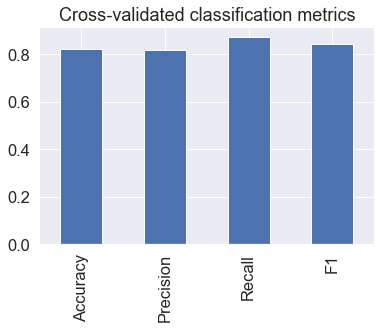

In [132]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prc,
                          "Recall": cv_recall,
                         "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)

**Feature Importance**

Which features contridbuted the most to the outcomes of the model and how

In [136]:
# Fit an instance of LogisticRegression
clf.fit(X_train, y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [137]:
# Check coef_
clf.coef_

array([[ 0.00671246, -1.58502785,  0.75396445, -0.00843205, -0.00396127,
        -0.3353385 ,  0.22931142,  0.02938387, -0.86471116, -0.5396918 ,
         0.21084975, -0.86551124, -0.68739785]])

In [139]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0067124615257888156,
 'sex': -1.5850278488769813,
 'cp': 0.7539644526655148,
 'trestbps': -0.008432046974861239,
 'chol': -0.003961265985967029,
 'fbs': -0.3353385023832911,
 'restecg': 0.22931141675958905,
 'thalach': 0.0293838672206668,
 'exang': -0.8647111590796852,
 'oldpeak': -0.5396917990779417,
 'slope': 0.2108497519883893,
 'ca': -0.8655112448250807,
 'thal': -0.6873978503318602}

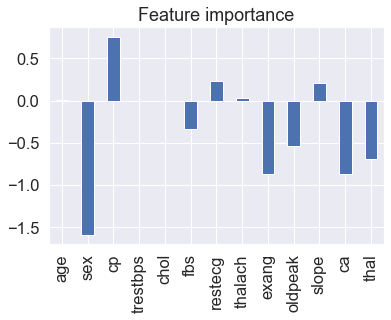

In [141]:
# Plot
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

## 6. Experimentation

Since, evaluation has not been reached yet, future possible ways for improvement include:

   * Collecting more data
   * Trying more categorization models, eg. CatBoost, XGBoost
   * More thoroughly tuning the hyperparameters of the current models

If successful, then the model may be exported and shared with others

## 7. Conclusion

It was determined that a 95% accuracy could not be reached with only these 13 health columns of data. However, a 85-88% accuracy was found to occur in both logistic regression and random forest classifier algorithms. A very promising result nonetheless.

<img src = "conc.jpg" />